# Live Code

##### About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

##### Objective
Menggunakan dataset https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility, buatlah model machine learning untuk mengklasifikasikan kemungkinan orang terkena serangan jantung. Bandingkan antara model Decision Tree dan Random Forest. Mana yang lebih baik untuk data ini?

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("heart.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Deskripsi dari kolom diatas:
- Age : age in years
- Sex : 1 = male; 0 = female
- CP : chest pain type
- TRESTBPS : resting blood pressure (in mm * Hg on admission to the hospital)
- CHOL : serum cholestoral in mg/dl
- FPS : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- RESTECH : resting electrocardiographic results
- THALACH : maximum heart rate achieved
- EXANG : exercise induced angina (1 = yes; 0 = no)
- OLDPEAK : ST depression induced by exercise relative to rest- 
- SLOPE : the slope of the peak exercise ST segment
- CA : number of major vessels (0-3) colored by flourosopy
- THAL : 3 = normal; 6 = fixed defect; 7 = reversable defect
- TARGET : 1 or 0

In [4]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Get descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Cleaning

#### Missing Value

In [7]:
# Melihat apakah ada missing value atau tidak
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak adanya missing value pada dataset

#### Duplicate

In [8]:
# Shows the duplicated data
df.duplicated().sum()

1

In [9]:
# Dropping the duplicates data
df.drop_duplicates(inplace=True)

# Double Check for the duplicated data
df.duplicated().sum()

0

#### Seperating Numerical and Categorical

In [12]:
num = df.drop(columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
cat = df[['sex','cp','fbs','restecg','exang','slope','ca','thal']]

### Exploratory Data Analysis

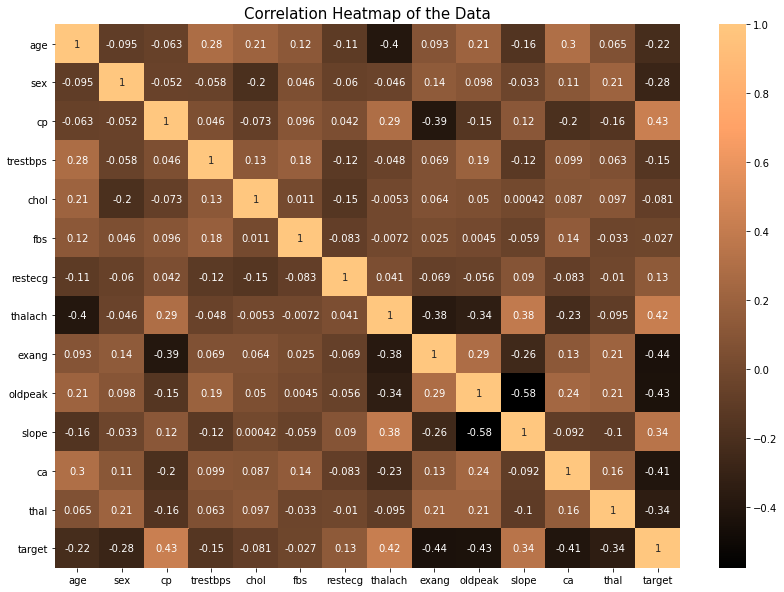

In [13]:
# lets check the Correlation Heat Map of the Data
plt.figure(figsize = (14, 10))

sns.heatmap(df.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Dari korelasi diatas, kita dapat melihat bahwa **cp**, **thalach**, **exang**, **oldpeak**, **slope**, **ca**, dan **thal** memiliki korelasi yang signifikan dengan **target**.

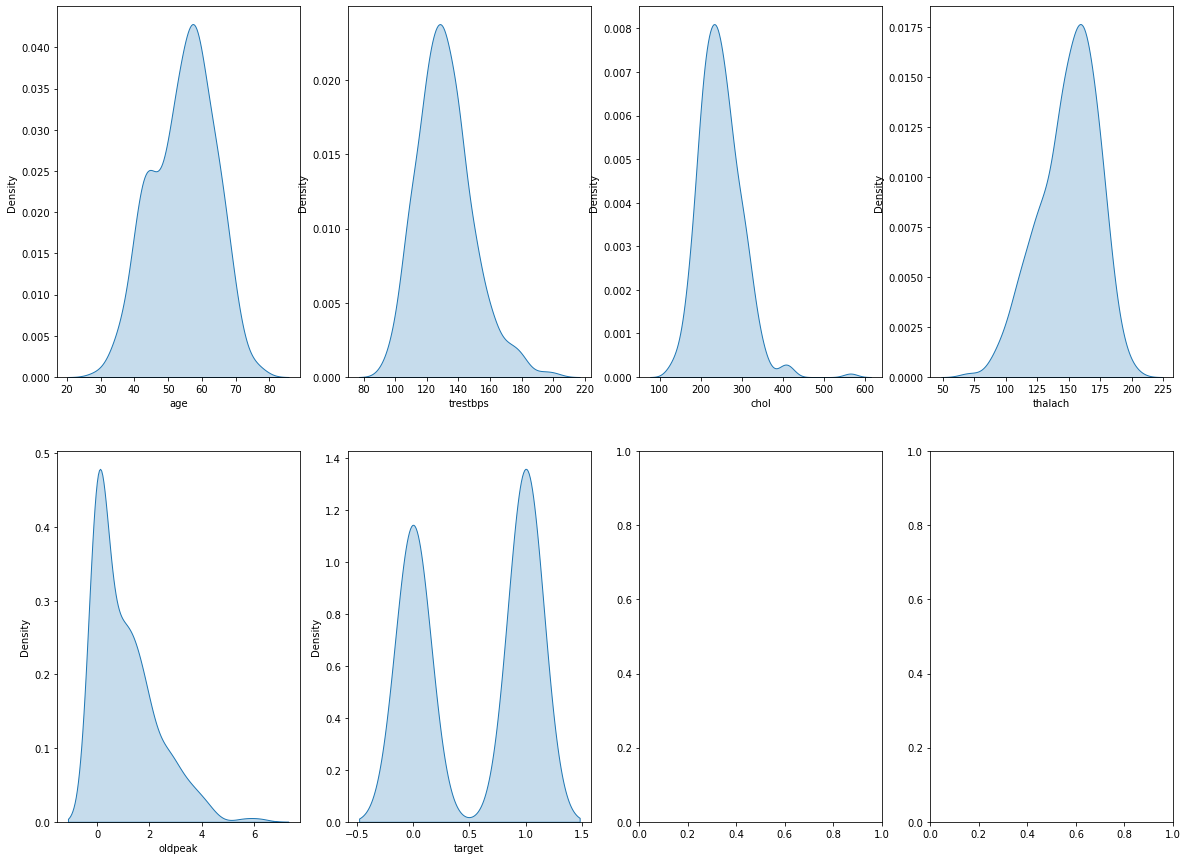

In [18]:
# Numerical Visualization
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(20,15))
i=0
j=0
for col in num.columns:
    sns.kdeplot(data=num,x=col,fill=True,ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0
    if i==2:
        break

#### Plot distribusi data numerik:
- Terdapat outlier pada kolom **trestbps**, **chol** dan **oldpeak**
- Terdapat dua peak pada kolom **target**
- Mayoritas kolom terdistribusi normal

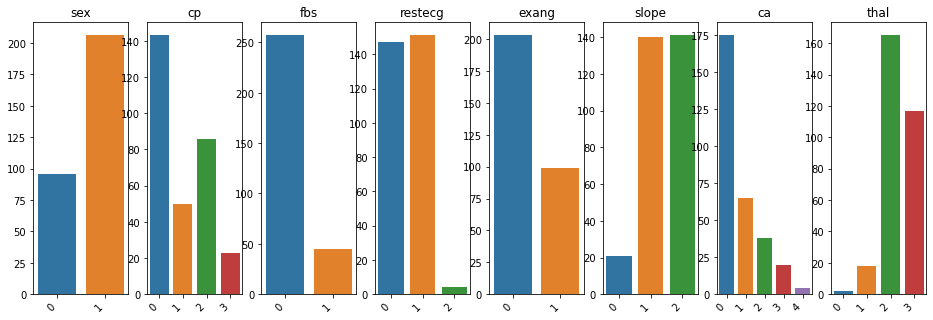

In [20]:
# Categorical Visualization
fig,axes=plt.subplots(ncols=8,figsize=(16,5))

for i,col in enumerate(cat.columns):
    sns.barplot(x=cat[col].value_counts().index, y=cat[col].value_counts().values, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(col)

#### Plot distribusi data kategorik:
- Masing-masing kolom merupakan data binary
- Lebih banyak pasien pria daripada wanita
- Lebih banyak pasien yang memiliki keluhan dengan Angina tipikal
- Lebih banyak pasien yang memiliki gula darah > 120 mg/dl
- Lebih banyak pasien yang memiliki hasil yang abnormal pada restingECG
- Lebih banyak pasien yang tidak mengalami Angina yang diinduksi oleh olahraga
- Sebagian besar pasien tidak atau hampir tidak mengalami depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat

#### Visualization

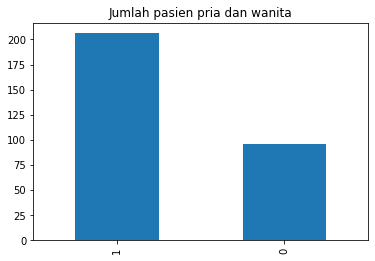

In [39]:
df['sex'].value_counts().plot(kind='bar').set_title("Jumlah pasien pria dan wanita");

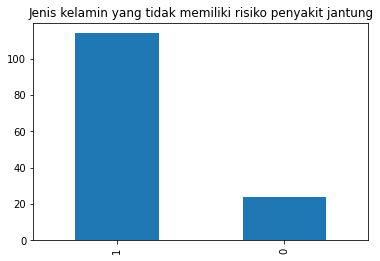

In [40]:
df['sex'].loc[df['target']==0].value_counts().plot(kind='bar').set_title("Jenis kelamin yang tidak memiliki risiko penyakit jantung");

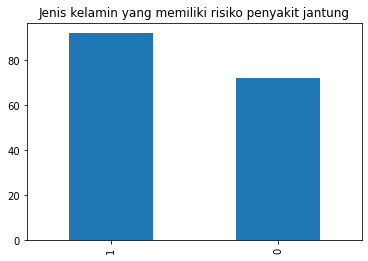

In [41]:
df['sex'].loc[df['target']==1].value_counts().plot(kind='bar').set_title("Jenis kelamin yang memiliki risiko penyakit jantung");

Dari ketiga barplot diatas dapat dikatakan bahwa mayoritas pasien pria yang memiliki atau tidak memiliki risiko penyakit jantung.

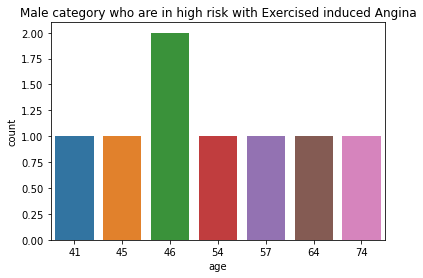

In [36]:
sns.countplot(x="age" , data=df.loc[(df["sex"]==0) & 
                                             (df["exang"]==1) &
                                             (df["target"]==1)]).set_title("Male category who are in high risk with Exercised induced Angina")
plt.show();

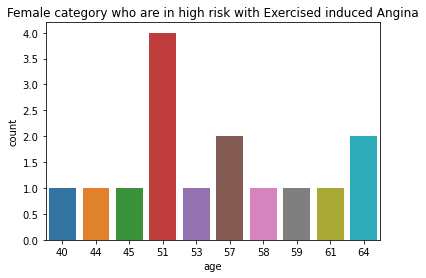

In [37]:
sns.countplot(x="age" , data=df.loc[(df["sex"]==1) & 
                                             (df["exang"]==1) &
                                             (df["target"]==1)]).set_title("Female category who are in high risk with Exercised induced Angina")
plt.show();

Dapat dikatakan bahwa kategori yang pria dan wanita yang berisiko tinggi dengan angina yang diinduksi latihan berumur 46 untuk pria dan 51 untuk wanita.

### Data Preprocessing

Pertama, kita akan melakukan pemilihan fitur menggunakan SelectKBest untuk memilih fitur mana saja yang akan digunakan pada modeling. Sebelum itu akan dilakukannya normalisasi data menggunakan MinMaxScaler.

##### Normalize the dataset

In [42]:
# Standaridzed data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

df1 = pd.DataFrame(scaler.transform(df), 
                  index=df.index, columns=df.columns)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


##### Select  best Features

In [49]:
# Untuk memberi informasi tentang top fitur
a = df1.loc[:,df1.columns!='target']
b = df1[['target']]

# SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=7)
selector.fit(a, b)
a_new = selector.transform(a)
print(a.columns[selector.get_support(indices=True)])

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], dtype='object')


Dapat dikatakan bahwa fitur yang akan diambil adalah **sex**, **cp**, **thalach**, **exang**, **oldpeak**, **slope** dan **ca**.

In [47]:
# Buat tabel baru untuk top fitur
data = df[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','target']]
data.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,target
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,1
2,0,1,172,0,1.4,2,0,1
3,1,1,178,0,0.8,2,0,1
4,0,0,163,1,0.6,2,0,1


##### Scalling data

In [50]:
# Standaridzed data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

##### Define X and y

In [51]:
# Mendefinisikan X dan y
X = data.drop(columns=['target'])
y = data['target']

##### Splitting data

In [52]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Total of Training data : ", len(X_train))
print("Total of Testing data : ", len(X_test))

Total of Training data :  211
Total of Testing data :  91


### Modelling

Dalam analisis ini, kami menggunakan Decision Tree dan Random Forest sebagai model untuk dataset.

In [55]:
# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

#### Decision Tree

confusion matrix
[[32 13]
 [ 5 41]]


              precision    recall  f1-score   support

           0       0.86      0.71      0.78        45
           1       0.76      0.89      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91

AUC Score :  0.801207729468599


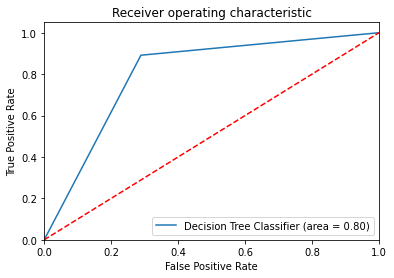

0.8200000000000001


In [64]:
# Decision Tree
tree = DecisionTreeClassifier(min_samples_leaf= 5, max_depth= 3, max_features= 5, criterion= 'gini',random_state=0)
tree.fit(X_train,y_train)

# Predict
pred_tree = tree.predict(X_test)

# Accuracy
score_tree = accuracy_score(y_test,pred_tree)

# Confusion Matrix
tree_conf_matrix = confusion_matrix(y_test, pred_tree)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,pred_tree))

#ROC Curve
tree_roc = roc_auc_score(y_test, pred_tree)
print("AUC Score : ", tree_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_tree)
plt.figure()
plt.plot(fpr1, tpr1, label='Decision Tree Classifier (area = %0.2f)' % tree_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_tree))

Dari hasil **Decision Tree** dapat dikatakan bahwa:

Decision Tree Classifier memiliki kemampuan yang cukup untuk mendeteksi **tidak terkena serangan jantung** dengan nilai *Precision* 0.86, nilai *Recall* 0.71 dan nilai F1 0.78

Dan memiliki kemampuan yang cukup juga untuk mendeteksi **terkena serangan jantung** dengan nilai *Precision* 0.76, nilai *Recall* 0.89 dan nilai F1 0.82

Jadi Decision Tree Classifier memiliki akurasi yang cukup baik yaitu 0.80 dan probabilitas yang cukup untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0.80

#### Random Forest Cllasifier

confusion matrix
[[35 10]
 [ 4 42]]


              precision    recall  f1-score   support

           0       0.90      0.78      0.83        45
           1       0.81      0.91      0.86        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

AUC Score :  0.8454106280193238


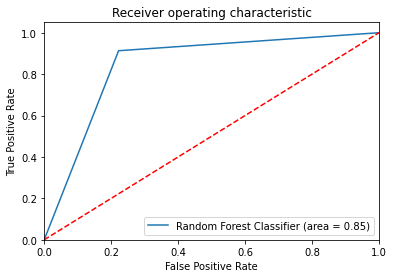

0.8571428571428572


In [57]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0,max_leaf_nodes=16,max_depth=5)
rfc.fit(X_train,y_train)

# Predict
pred_rfc = rfc.predict(X_test)

# Accuracy
score_rfc = accuracy_score(y_test,pred_rfc)

# Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, pred_rfc)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rfc))

#ROC Curve
rfc_roc = roc_auc_score(y_test, pred_rfc)
print("AUC Score : ", rfc_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_rfc)
plt.figure()
plt.plot(fpr1, tpr1, label='Random Forest Classifier (area = %0.2f)' % rfc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_rfc))

Sedangkan dari hasil **Random Forest** dapat dikatakan bahwa:

Random Forest Classifier memiliki kemampuan yang tinggi untuk mendeteksi **tidak terkena serangan jantung** dengan nilai *Precision* 0.90, nilai *Recall* 0.78 dan nilai F1 0.83

Dan memiliki kemampuan yang tinggi juga untuk mendeteksi **terkena serangan jantung** dengan nilai *Precision* 0.81, nilai *Recall* 0.91 dan nilai F1 0.86

Jadi Random Forest Classifier memiliki akurasi yang tinggi yaitu 0.84 dan probabilitas yang cukup untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0.85

### Accuracy Model

Setelah dilakukan definisi model diatas, akan dilakukan perbandingan antara dua model yaitu Decision Tree dan Random Forest untuk dilihat akurasinya.

In [65]:
model = pd.DataFrame({'Model': ['Decision Tree','Random Forest'], 
                         'Accuracy (%)': [score_tree*100,score_rfc*100]})
model

,Model,Accuracy (%)
0,Decision Tree,80.219780
1,Random Forest,84.615385


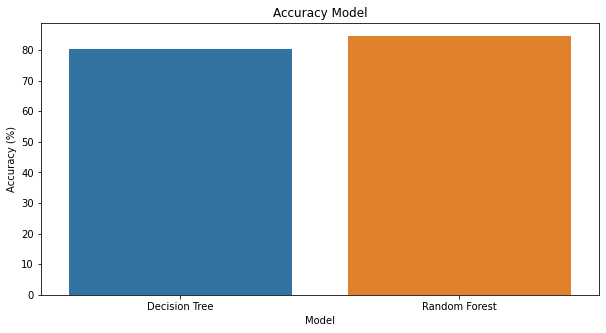

In [66]:
# Showing the bar chart
plt.figure(figsize=(10,5))
plt.title('Accuracy Model')
sns.barplot(data=model, x='Model', y='Accuracy (%)')
plt.show()

Seperti yang terlihat pada grafik bar diatas dapat dikatakan bahwa **Random Forest** yang memiliki akurasi terbaik untuk memprediksi **Serangan Jantung** dengan nilai akurasi sebesar 84%.

### Model Inference

Setelah melakukan pengevaluasian dari kedua model ditemukan bahwa Random Forest memiliki akurasi yang terbaik, maka dari itu akan dicoba melakukan test di data baru

In [61]:
data.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,target
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,1
2,0,1,172,0,1.4,2,0,1
3,1,1,178,0,0.8,2,0,1
4,0,0,163,1,0.6,2,0,1


In [62]:
# New data 
new_data = [[0, 2, 175, 1, 2.4, 1, 1]]

# Predict
predict = rfc.predict(new_data)

print("Hasil Klasifikasi model Random Forest : \n")
print('Target {}'.format(predict))

Hasil Klasifikasi model Random Forest : 

Target [0]


### Kesimpulan

Dataset:

- Pasien yang memiliki risiko serangan jantung yaitu pria
- Lebih banyak pasien yang memiliki keluhan dengan Angina tipikal
- Lebih banyak pasien yang memiliki gula darah > 120 mg/dl
- Lebih banyak pasien yang memiliki hasil yang abnormal pada restingECG
- Lebih banyak pasien yang tidak mengalami Angina yang diinduksi oleh olahraga
- Sebagian besar pasien tidak atau hampir tidak mengalami depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat

Model:
Setelah dilakukan penggabungan untuk melihat akurasi yang tertinggi, pada hasil diatas didapatkan bahwa **Random Forest Classifier** memiliki akurasi yang tinggi yaitu 0.84 dan memiliki kemampuan yang tinggi juga untuk mendeteksi **terkena serangan jantung** dengan nilai *Precision* 0.81, nilai *Recall* 0.91 dan nilai F1 0.86